In [1]:
import os
# Set working directory
os.chdir("D:/ACP")  # Windows path fix: use forward slash or raw string

print("Current Working Directory:", os.getcwd())

Current Working Directory: D:\ACP


In [2]:
import numpy as np
import pandas as pd
import joblib
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
)
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load the datasets (datasets were already splited and saved as csv files, 80,20 split)
train_data = pd.read_csv("acp_train_data.csv") #train data
test_data = pd.read_csv("acp_test_data.csv") #test data
# Step 2: Separate labels and features
y_train, X_train = train_data.iloc[:, 2], train_data.iloc[:, 3:] # third column: Label, # from fourth column onward: features
y_test, X_test = test_data.iloc[:, 2], test_data.iloc[:, 3:]

In [4]:
# Define the AdaBoost model and hyperparameter grid
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
adaboost_model = AdaBoostClassifier(estimator=base_estimator, random_state=42) #base_estimator=base_estimator means use the DecisionTreeClassifier as the base estimator

param_grid = {
    'n_estimators': [50, 200, 400, 500, 600, 800, 1000],               # Number of weak learners, default is 50, range is 10 to 1000
    'learning_rate': [0.01, 0.1, 1.0],            # Controls contribution of each weak learner, default is 1.0, range is 0.01 to 1.0
    'algorithm': ['SAMME.R'],            # Adaptive boosting algorithm, default is SAMME.R, range is SAMME and SAMME.R; SAMME is equivalent to AdaBoost, SAMME.R is generally faster and often performs better for classification tasks.
    'estimator__max_depth': [1, 3, 5, 7, 9],       # Depth of the decision tree base estimator, default is 1, range is 1 to 10
    'estimator__max_features': ['sqrt', 'log2'], # Number of features to consider when looking for the best split
}
# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=adaboost_model,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=1,
    cv=5,
    verbose=2,
)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Save best hyperparameters to a file
with open('best_model_info_adaboost.txt', 'w') as f:
    f.write("Best Hyperparameters:\n")
    for param, value in grid_search.best_params_.items():
        f.write(f"{param}: {value}\n")

print("Best model information has been saved to 'best_model_info_adaboost.txt'")

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   2.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   7.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   7.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   8.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   6.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   7.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  16.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  14.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  15.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  14.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  16.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  17.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  20.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  18.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  20.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  18.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  21.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  24.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  21.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  22.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  23.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  29.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  30.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  30.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  31.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  32.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  37.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  36.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  37.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  40.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  37.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   8.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   8.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   8.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   5.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   8.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  16.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  15.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  14.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  16.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  14.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  18.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  21.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  17.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  22.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  18.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  23.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  22.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  25.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  23.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  23.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  32.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  32.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  32.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  32.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  31.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  39.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  38.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  36.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  31.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  33.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   1.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   1.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   6.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   6.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   6.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   6.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   6.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  12.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  13.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  13.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  13.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  13.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  17.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  16.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  16.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  18.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  17.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  19.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  21.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  19.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  21.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  21.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  29.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  27.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  29.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  29.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  29.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  37.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  37.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  35.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  36.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  36.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   8.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   5.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   7.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   8.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   8.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  13.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  16.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  13.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  16.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  13.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  18.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  19.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  17.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  19.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  18.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  21.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  22.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  23.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  21.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  21.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  29.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  29.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  29.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  30.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  30.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  37.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  37.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  37.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  37.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  38.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   1.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   1.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   8.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   8.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   8.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   6.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   7.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  16.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  14.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  16.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  17.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  13.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  20.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  18.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  22.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  18.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  19.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  23.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  22.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  25.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  21.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  23.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  30.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  29.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  31.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  30.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  30.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  37.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  39.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  40.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  37.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  37.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   2.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   6.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   7.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   8.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   8.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   8.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  13.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  16.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  17.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  14.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  16.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  19.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  19.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  20.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  17.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  19.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  21.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  24.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  21.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  19.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  19.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  25.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  26.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  25.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  25.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  28.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  35.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  36.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  35.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  35.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=1, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  35.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   2.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   1.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   8.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   8.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   5.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   8.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   8.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  14.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  14.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  16.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  14.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  14.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  19.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  20.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  20.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  20.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  18.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  24.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  24.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  22.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  22.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  23.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  30.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  30.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  30.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  30.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  32.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  40.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  42.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  37.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  40.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  39.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   2.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   2.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   1.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   1.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   8.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   8.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   8.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   6.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   8.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  16.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  15.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  15.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  16.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  18.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  19.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  20.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  19.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  18.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  22.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  24.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  26.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  25.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  23.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  25.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  31.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  31.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  31.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  31.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  32.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  40.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  39.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  40.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  39.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  40.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   8.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   8.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   5.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   8.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   8.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  17.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  13.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  16.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  16.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  14.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  20.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  18.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  21.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  18.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  22.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  22.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  27.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  23.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  27.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  22.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  30.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  34.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  31.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  31.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  33.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  40.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  41.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  34.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  32.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  32.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   2.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   2.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   1.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   1.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   7.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   6.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   6.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   7.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   5.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  13.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  13.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  13.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  13.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  13.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  16.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  16.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  17.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  18.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  18.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  19.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  22.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  19.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  21.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  22.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  31.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  28.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  31.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  30.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  27.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  39.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  36.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  37.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  37.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  36.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   1.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   1.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   8.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   8.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   5.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   7.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   8.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  13.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  17.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  13.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  16.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  13.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  22.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  17.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  17.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  20.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  17.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  22.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  25.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  22.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  22.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  22.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  31.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  30.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  30.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  31.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  32.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  37.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  38.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  37.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  38.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  38.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   1.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   8.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   8.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   8.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   5.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   8.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  16.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  13.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  16.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  15.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  14.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  21.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  18.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  21.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  18.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  20.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  24.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  22.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  24.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  21.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  25.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  30.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  29.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  30.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  33.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  30.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  38.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  38.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  39.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  40.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=3, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  40.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   2.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   1.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   1.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   1.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   1.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   9.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   9.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   9.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   9.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   6.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  17.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  17.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  14.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  18.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  18.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  19.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  22.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  19.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  21.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  19.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  26.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  20.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  21.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  21.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  21.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  26.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  28.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  27.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  30.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  29.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  35.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  37.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  35.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  37.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  38.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   2.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   2.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   1.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   6.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   9.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   7.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   7.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   9.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  14.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  15.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  17.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  14.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  14.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  19.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  20.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  20.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  18.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  19.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  24.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  24.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  24.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  24.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  24.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  33.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  33.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  32.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  32.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  32.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  38.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  41.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  40.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  37.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  41.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   5.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   9.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   8.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   8.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   6.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  18.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  15.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  18.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  16.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  16.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  20.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  20.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  18.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  22.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  19.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  27.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  23.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  23.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  27.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  24.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  32.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  33.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  32.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  33.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  34.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  39.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  40.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  42.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  42.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  42.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   2.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   1.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   1.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   1.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   8.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   8.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   8.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   8.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   7.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  14.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  17.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  14.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  16.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  17.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  18.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  20.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  18.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  21.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  20.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  23.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  23.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  25.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  23.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  24.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  30.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  31.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  32.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  30.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  29.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  40.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  31.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  31.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  32.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  33.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   1.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   1.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   1.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   7.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   6.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   5.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   8.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   5.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  14.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  13.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  13.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  14.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  14.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  16.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  17.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  18.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  17.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  17.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  19.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  22.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  22.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  22.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  22.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  28.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  30.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  30.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  28.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  29.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  37.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  37.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  37.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  39.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  38.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   1.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   1.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   1.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   8.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   8.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   6.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   7.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   8.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  14.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  16.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  14.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  16.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  14.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  20.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  17.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  20.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  19.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  18.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  24.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  24.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  22.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  22.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  22.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  30.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  30.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  31.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  30.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  30.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  38.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  39.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  38.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  39.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=5, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  39.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   2.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   2.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   2.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   2.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   1.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   6.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   9.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   9.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   9.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   6.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  18.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  16.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  17.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  18.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  15.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  23.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  20.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  20.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  22.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  20.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  26.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  24.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  26.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  25.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  24.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  37.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  34.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  33.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  32.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  34.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  43.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  42.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  43.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  42.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  42.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   2.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   2.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   2.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   7.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   9.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   9.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   9.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   8.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  16.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  18.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  15.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  18.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  18.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  19.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  24.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  18.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  18.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  17.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  21.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  21.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  21.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  21.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  21.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  29.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  29.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  30.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  30.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  30.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  39.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  36.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  40.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  40.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  39.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   1.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   8.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   9.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   6.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   9.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   9.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  15.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  15.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  16.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  16.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  15.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  20.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  19.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  21.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  21.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  21.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  24.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  25.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  24.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  25.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  25.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  33.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  32.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  34.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  35.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  35.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  43.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  39.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  43.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  45.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  42.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   1.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   1.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   1.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   8.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   8.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   8.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   6.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   7.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  16.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  14.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  15.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  16.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  14.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  21.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  18.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  21.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  18.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  20.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  22.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  22.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  24.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  22.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  24.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  31.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  30.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  30.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  31.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  34.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  41.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  41.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  38.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  38.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  38.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   8.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   7.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   6.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   8.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   8.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  16.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  13.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  16.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  17.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  14.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  21.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  17.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  20.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  19.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  19.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  25.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  24.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  23.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  24.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  21.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  33.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  30.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  30.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  32.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  27.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  32.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  32.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  32.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  33.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  35.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   1.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   1.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   2.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   7.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   6.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   7.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   6.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   8.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  14.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  14.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  14.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  13.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  13.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  18.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  17.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  16.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  17.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  18.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  22.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  22.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  22.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  22.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  22.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  30.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  30.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  29.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  28.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  30.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  36.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  39.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  38.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  38.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=7, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  40.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   2.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   2.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   2.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   1.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=50; total time=   1.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   8.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   9.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   9.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   6.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=200; total time=   9.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  16.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  17.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  15.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  18.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=400; total time=  15.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  22.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  20.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  20.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  22.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=500; total time=  21.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  25.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  26.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  24.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  26.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=600; total time=  25.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  34.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  35.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  33.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  33.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=800; total time=  32.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  42.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  45.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  43.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  43.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.01, n_estimators=1000; total time=  43.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   2.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   2.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   1.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=50; total time=   1.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   9.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   9.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   9.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   7.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=200; total time=   8.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  18.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  16.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  19.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  15.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=400; total time=  18.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  20.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  22.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  21.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  24.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=500; total time=  21.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  27.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  24.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  28.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  25.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=600; total time=  27.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  34.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  33.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  34.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  35.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=800; total time=  35.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  45.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  44.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  43.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  43.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=0.1, n_estimators=1000; total time=  44.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=50; total time=   2.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   7.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   9.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   9.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   9.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=200; total time=   9.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  15.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  14.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  14.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  14.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=400; total time=  14.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  18.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  18.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  18.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  18.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=500; total time=  19.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  23.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  23.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  23.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  23.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=600; total time=  22.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  32.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  29.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  34.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  32.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=800; total time=  34.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  41.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  41.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  41.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  42.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=sqrt, learning_rate=1.0, n_estimators=1000; total time=  42.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   1.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   2.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   8.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   7.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   6.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   8.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=200; total time=   8.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  14.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  16.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  14.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  15.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=400; total time=  15.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  18.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  21.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  18.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  18.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=500; total time=  20.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  23.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  22.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  22.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  23.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=600; total time=  23.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  29.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  30.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  31.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  32.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=800; total time=  30.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  40.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  40.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  39.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  39.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.01, n_estimators=1000; total time=  39.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   2.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=50; total time=   1.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   7.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   8.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   8.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   8.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=200; total time=   5.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  17.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  15.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  15.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  16.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=400; total time=  14.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  20.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  18.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  19.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  20.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=500; total time=  17.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  25.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  22.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  25.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  23.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=600; total time=  22.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  33.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  31.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  31.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  31.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=800; total time=  33.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  40.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  39.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  38.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  39.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=0.1, n_estimators=1000; total time=  39.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   2.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   2.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   2.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   2.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=50; total time=   2.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   6.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   7.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   8.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   8.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=200; total time=   8.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  13.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  17.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  17.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  15.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=400; total time=  18.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  18.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  20.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  18.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  16.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=500; total time=  17.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  19.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  19.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  19.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  19.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=600; total time=  19.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  27.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  28.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  28.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  28.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=800; total time=  28.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  34.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  35.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  36.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  36.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, estimator__max_depth=9, estimator__max_features=log2, learning_rate=1.0, n_estimators=1000; total time=  38.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Hyperparameters: {'algorithm': 'SAMME.R', 'estimator__max_depth': 5, 'estimator__max_features': 'log2', 'learning_rate': 0.1, 'n_estimators': 1000}
Best model information has been saved to 'best_model_info_adaboost.txt'


In [6]:
# Step 6: Use the best model from GridSearchCV
best_adaboost_model = grid_search.best_estimator_

#save best model to a file
joblib.dump(best_adaboost_model, "best_adaboost_model.pkl")

['best_adaboost_model.pkl']

In [7]:
# Step 8: Fit the model on the training data
best_adaboost_model.fit(X_train, y_train)

# Evaluate on the test dataset
y_test_pred = best_adaboost_model.predict(X_test)
y_test_prob = best_adaboost_model.predict_proba(X_test)[:, 1]

# Calculate and print accuracy, classification reports, and confusion matrices
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"adaboost Test Accuracy: {test_accuracy * 100:.2f}%")

# Confusion Matrices
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Data):\n", confusion_matrix_test)

# Sensitivity and Specificity calculation
def calculate_sensitivity_specificity(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

sensitivity_test, specificity_test = calculate_sensitivity_specificity(confusion_matrix_test)
print("Test Data - Sensitivity:", sensitivity_test, "Specificity:", specificity_test)

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


adaboost Test Accuracy: 78.92%
Confusion Matrix (Test Data):
 [[73 18]
 [21 73]]
Test Data - Sensitivity: 0.776595744680851 Specificity: 0.8021978021978022


In [8]:
print("Confusion Matrix (Test Data):")
print(f"TN: {confusion_matrix_test[0,0]}  FP: {confusion_matrix_test[0,1]}")
print(f"FN: {confusion_matrix_test[1,0]}  TP: {confusion_matrix_test[1,1]}")

Confusion Matrix (Test Data):
TN: 73  FP: 18
FN: 21  TP: 73


In [9]:
from sklearn.metrics import f1_score
# calculation of F1 score
f1_test = f1_score(y_test, y_test_pred)
print("F1 Score (Test Data):", f1_test)

F1 Score (Test Data): 0.7891891891891892


In [10]:
#calculation of classification report for test and evaluation data
print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        91
           1       0.80      0.78      0.79        94

    accuracy                           0.79       185
   macro avg       0.79      0.79      0.79       185
weighted avg       0.79      0.79      0.79       185



In [11]:
# Evaluate on the test dataset
y_test_pred = best_adaboost_model.predict(X_test)
y_test_prob = best_adaboost_model.predict_proba(X_test)[:, 1]

Test Data ROC AUC: 0.8718728080430208
Test Data FPR: [0.         0.         0.         0.01098901 0.01098901 0.02197802
 0.02197802 0.03296703 0.03296703 0.04395604 0.04395604 0.05494505
 0.05494505 0.06593407 0.06593407 0.08791209 0.08791209 0.10989011
 0.10989011 0.12087912 0.12087912 0.13186813 0.13186813 0.16483516
 0.16483516 0.17582418 0.17582418 0.18681319 0.18681319 0.1978022
 0.1978022  0.20879121 0.20879121 0.23076923 0.23076923 0.24175824
 0.24175824 0.26373626 0.26373626 0.28571429 0.28571429 0.2967033
 0.2967033  0.30769231 0.30769231 0.32967033 0.32967033 0.35164835
 0.35164835 0.37362637 0.37362637 0.45054945 0.45054945 0.46153846
 0.46153846 0.73626374 0.73626374 0.76923077 0.76923077 1.
 1.        ]
Test Data TPR: [0.         0.0106383  0.23404255 0.23404255 0.34042553 0.34042553
 0.35106383 0.35106383 0.39361702 0.39361702 0.44680851 0.44680851
 0.5106383  0.5106383  0.58510638 0.58510638 0.60638298 0.60638298
 0.61702128 0.61702128 0.64893617 0.64893617 0.67021277 0.

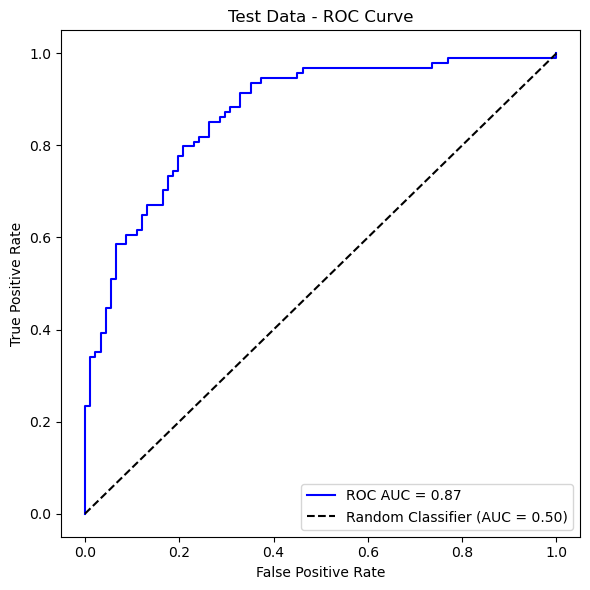

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate ROC for test dataset
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Print the values
print("Test Data ROC AUC:", roc_auc_test)
print("Test Data FPR:", fpr_test)
print("Test Data TPR:", tpr_test)
print("Test Data Thresholds:", thresholds_test)

# Create a plot
fig, ax = plt.subplots(figsize=(6, 6))  # This defines 'ax' properly

# Plot ROC curve
ax.plot(fpr_test, tpr_test, label=f"ROC AUC = {roc_auc_test:.2f}", color="blue")
ax.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.50)")
ax.set_title("Test Data - ROC Curve")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")

# Adjust layout and save figure
plt.tight_layout()
plt.savefig("adaboost_roc_auc_curve.png", dpi=500)
print("ROC curve saved as 'adaboost_roc_auc_curve.png'.")

# Show the plot
plt.show()

In [13]:
# Perform 10-fold cross-validation on the best model
cross_val_scores = cross_val_score(best_adaboost_model, X_train, y_train, cv=10, scoring='accuracy')
print("10-Fold Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean 10-Fold CV Accuracy:", cross_val_scores.mean())

# save accuracy of each fold to a text file
with open('cv_accuracies_adaboost.txt', 'w') as f:
    f.write("Cross-Validation Accuracies for each fold:\n")
    for i, score in enumerate(cross_val_scores):
        f.write(f"Fold {i+1} Accuracy: {score:.4f}\n")

print("Accuracy of each fold has been saved to 'cv_accuracies_adaboost.txt'")

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.wa

10-Fold Cross-Validation Accuracy Scores: [0.77027027 0.83783784 0.74324324 0.7972973  0.81081081 0.77027027
 0.78378378 0.77027027 0.80821918 0.82191781]
Mean 10-Fold CV Accuracy: 0.7913920770085153
Accuracy of each fold has been saved to 'cv_accuracies_adaboost.txt'


Mean Accuracy: 79.14
Mean AUC: 1.0000


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.wa

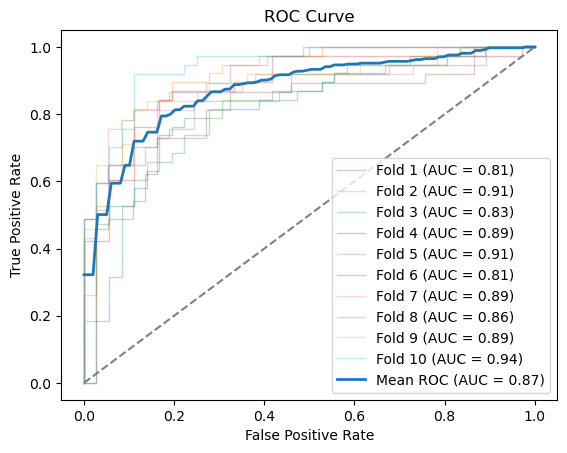

In [14]:
# make roc curve of all folds with mean auc and mean accuracy printed on the plot
mean_accuracy = cross_val_scores.mean() * 100
print(f"Mean Accuracy: {mean_accuracy:.2f}")
# Step 6: Generate ROC Curve
mean_auc = roc_auc_score(y_train, best_adaboost_model.predict_proba(X_train)[:, 1])
print(f"Mean AUC: {mean_auc:.4f}")

cv = StratifiedKFold(n_splits=10)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
for i, (train_idx, test_idx) in enumerate(cv.split(X_train, y_train)):
    best_adaboost_model.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    y_prob = best_adaboost_model.predict_proba(X_train.iloc[test_idx])[:, 1]
    fpr, tpr, _ = roc_curve(y_train.iloc[test_idx], y_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig("cv_roc_curve_adaboost.png", dpi=500)
plt.show()

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
# Compute metrics
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient (MCC):", mcc)

Precision: 0.8021978021978022
Recall: 0.776595744680851
F1 Score: 0.7891891891891892
Matthews Correlation Coefficient (MCC): 0.5787935468786533
